In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from pylab import MaxNLocator
import seaborn as sns; sns.set()
from matplotlib.colors import LogNorm
from matplotlib import gridspec
from sklearn.manifold import TSNE

#for exporting to Adobe Illustrator
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

### Load t-SNE embeddings if already run

In [3]:
t_SNE_coords = np.loadtxt('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape/Genotypes_Filtered_2/pairwise_distance_matrix/tb_output/tSNE_embeddings_from_pairwise_SNP_dist.txt')

In [4]:
plt.style.use('ggplot')
plt.rcParams['lines.linewidth']=0
plt.rcParams['axes.facecolor']='1.0'
plt.rcParams['xtick.color']='black'
plt.rcParams['axes.grid']=False
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['grid.color']= '1.0'
plt.rcParams.update({'font.size': 9})
plt.rc('font', family='serif')

Get ordering of isolates & lineage calls from isolate annotation file

In [5]:
isolate_annotation_DF = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape/Genotypes_Filtered_2/genotypes_isolate_annotation.pkl')

In [6]:
isolate_annotation_DF.head()

,lineage_1,lineage_2,lineage_3,lineage_4,lineage_5,lineage_6,lineage_7,lineage_8,lineage_9,lineage_10,lineage_11,isolate_ID,lineage_call,group
0,4,2,1,2,1,1,i3,1,NaN,NaN,NaN,SAMEA3558733,4.2.1.2.1.1.i3.1,4B
1,4,2,1,2,2,1,1,NaN,NaN,NaN,NaN,SAMN03648641,4.2.1.2.2.1.1,4B
2,3,1,1,i1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMN03647419,3.1.1.i1,3
3,4,2,1,2,1,1,i1,NaN,NaN,NaN,NaN,SAMEA3671418,4.2.1.2.1.1.i1,4B
4,1,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMN07659096,1.1.1.2,1


In [7]:
np.shape(isolate_annotation_DF)

(31428, 14)

## [1] tSNE of all isolates

In [8]:
def plot_tSNE(ax):

    ## fig , ax = plt.subplots()

    circ_size = 24
    linewidth = 0.2

    isolate = ax.scatter( t_SNE_coords[: , 0] , t_SNE_coords[: , 1]  , color = '0.25' , edgecolor = 'white' , linewidth = linewidth , alpha = 0.25 , s = circ_size)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.tick_params(axis='y', which='major', labelsize=10.5, pad = -2, labelcolor = 'k', rotation = 90)
    ax.tick_params(axis='x', which='major', labelsize=10.5, pad = -2, labelcolor = 'k')

    #add axis labels
    ax.set_xlabel('t-SNE 1' , fontsize = '10.5' , color = 'k', labelpad = 3)
    ax.set_ylabel('t-SNE 2', fontsize = '10.5', color = 'k', labelpad = 3)

    '''
    fig = plt.gcf()
    fig.set_size_inches(7.0, 7.0)
    fig.tight_layout()

    ## file_name = '/n/data1/hms/dbmi/farhat/Roger/inhost_TB_dynamics_project/genotypes_matrix_and_tSNE/figures/t_SNE_plots/4_lineage4.pdf'
    ## plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

    plt.show()
    '''

## [2] *Function* to color isolates by isolate group seperately

In [9]:
def plot_tSNE_for_isolate_group(isolate_group , color, ax):

    ## fig , ax = plt.subplots()

    circ_size = 8
    linewidth = 0.05

    #non isolate group isolates
    non_group_color = ax.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.group != isolate_group] , t_SNE_coords[: , 1][isolate_annotation_DF.group != isolate_group]  , color = '0.85' , edgecolor = 'white' , linewidth = linewidth , alpha = 0.6 , s = circ_size)

    #isolate group isolates
    group_color = ax.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.group == isolate_group] , t_SNE_coords[: , 1][isolate_annotation_DF.group == isolate_group]  , color = color , edgecolor = 'white' , linewidth = linewidth , alpha = 1.0 , s = circ_size)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    #ax.tick_params(axis='y', which='major', labelsize=7, pad = -2, labelcolor = 'k', rotation = 90)
    #ax.tick_params(axis='x', which='major', labelsize=7, pad = -2, labelcolor = 'k')
    ax.set_xticks([])
    ax.set_yticks([])
    num_isolates_in_group = str(sum(isolate_annotation_DF.group == isolate_group))
    ax.set_title('Group ' + isolate_group + '  (N={0})'.format(num_isolates_in_group), fontsize=8.5, color = 'k', pad = -0.75)

    '''
    fig = plt.gcf()
    fig.set_size_inches(3.5, 3.5)
    fig.tight_layout()

    ## file_name = '/n/data1/hms/dbmi/farhat/Roger/inhost_TB_dynamics_project/genotypes_matrix_and_tSNE/figures/t_SNE_plots/4_lineage4.pdf'
    ## plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

    plt.show()
    '''

In [ ]:
plot_tSNE_for_isolate_group('1' , 'xkcd:bright pink')

In [ ]:
plot_tSNE_for_isolate_group('2' , 'xkcd:bright blue')

In [ ]:
plot_tSNE_for_isolate_group('3' , 'xkcd:purple')

In [ ]:
plot_tSNE_for_isolate_group('4A' , 'xkcd:red')

In [ ]:
plot_tSNE_for_isolate_group('4B' , 'xkcd:light red')

In [ ]:
plot_tSNE_for_isolate_group('4C' , 'xkcd:orange')

In [ ]:
plot_tSNE_for_isolate_group('5' , 'xkcd:brown')

In [ ]:
plot_tSNE_for_isolate_group('6' , 'xkcd:green')

## [3] Within-Lineage Diversity

#### How to load pairwise SNP distance matrix & corresponding isolate annotation

In [10]:
pairwise_SNP_dist = np.load('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape/Genotypes_Filtered_2/pairwise_distance_matrix/pairwise_SNP_distance_matrix.npy')

In [11]:
pairwise_SNP_dist

array([[   0,  606, 1139, ..., 1061,  174,  670],
       [ 606,    0, 1124, ..., 1036,  623,  645],
       [1139, 1124,    0, ..., 1035, 1152, 1177],
       ...,
       [1061, 1036, 1035, ...,    0, 1066, 1095],
       [ 174,  623, 1152, ..., 1066,    0,  683],
       [ 670,  645, 1177, ..., 1095,  683,    0]])

In [12]:
np.shape(pairwise_SNP_dist)

(31428, 31428)

In [13]:
isolate_annotation_DF = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape/Genotypes_Filtered_2/genotypes_isolate_annotation.pkl')

In [14]:
isolate_annotation_DF.head()

,lineage_1,lineage_2,lineage_3,lineage_4,lineage_5,lineage_6,lineage_7,lineage_8,lineage_9,lineage_10,lineage_11,isolate_ID,lineage_call,group
0,4,2,1,2,1,1,i3,1,NaN,NaN,NaN,SAMEA3558733,4.2.1.2.1.1.i3.1,4B
1,4,2,1,2,2,1,1,NaN,NaN,NaN,NaN,SAMN03648641,4.2.1.2.2.1.1,4B
2,3,1,1,i1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMN03647419,3.1.1.i1,3
3,4,2,1,2,1,1,i1,NaN,NaN,NaN,NaN,SAMEA3671418,4.2.1.2.1.1.i1,4B
4,1,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMN07659096,1.1.1.2,1


In [15]:
np.shape(isolate_annotation_DF)

(31428, 14)

#### Drop mis-classified isolates

- L1: 3
    - SAMEA3445265
    - SAMEA1119746
    - SAMN06209986
        
- L2: 4
    - SAMEA3558144
    - SAMEA5366594
    - SAMEA5366622
    - SAMEA5366610
        
- L3: 2
    - SAMN02398716
    - SAMN08436122
        
- L4A: 1
    - SAMEA3359387
    
-  L4B: 0
    
- L4C: 4
    - SAMEA2783243
    - SAMN07236506
    - SAMEA104153428
    - SAMEA961670
    
- L5: 0
    
- L6: 0

In [16]:
misclassified_isolates_list = ['SAMEA3445265','SAMEA1119746','SAMN06209986','SAMEA3558144','SAMEA5366594','SAMEA5366622','SAMEA5366610','SAMN02398716','SAMN08436122','SAMEA3359387','SAMEA2783243','SAMN07236506','SAMEA104153428','SAMEA961670']

In [17]:
isolate_annotation_DF[[(isolate_id in misclassified_isolates_list) for isolate_id in isolate_annotation_DF.isolate_ID]]

,lineage_1,lineage_2,lineage_3,lineage_4,lineage_5,lineage_6,lineage_7,lineage_8,lineage_9,lineage_10,lineage_11,isolate_ID,lineage_call,group
780,3,1,1,i1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMN08436122,3.1.1.i1,3
2658,4,2,1,1,1,2,2,1,NaN,NaN,NaN,SAMN07236506,4.2.1.1.1.2.2.1,4C
4344,4,2,1,1,1,2,2,2,NaN,NaN,NaN,SAMEA961670,4.2.1.1.1.2.2.2,4C
5734,4,2,1,1,1,2,2,1,NaN,NaN,NaN,SAMEA2783243,4.2.1.1.1.2.2.1,4C
12056,4,1,i1,2,1,NaN,NaN,NaN,NaN,NaN,NaN,SAMEA3359387,4.1.i1.2.1,4A
14504,1,2,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,SAMN06209986,1.2.1.1.1,1
17407,1,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMEA3445265,1.2.2.2,1
23065,4,2,1,1,1,2,2,1,NaN,NaN,NaN,SAMEA104153428,4.2.1.1.1.2.2.1,4C
23426,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMEA5366622,2.1,2
24095,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMEA3558144,2.2.2,2


#### Filter out isolates from pairwise SNP distance matrix & isolate annotation DF

In [18]:
misclassified_isolates_filter = np.array([(isolate_id not in misclassified_isolates_list) for isolate_id in isolate_annotation_DF.isolate_ID])

#drop isolates from isolate annotation DF
isolate_annotation_DF_missclassified_dropped = isolate_annotation_DF[misclassified_isolates_filter]
isolate_annotation_DF_missclassified_dropped.reset_index(inplace = True, drop = True)

#slice out the rows that correspond to mis-classified isolates
pairwise_SNP_dist = pairwise_SNP_dist[misclassified_isolates_filter , :]

#slice out the columns that correspond to mis-classified isolates
pairwise_SNP_dist = pairwise_SNP_dist[: , misclassified_isolates_filter]

In [19]:
pairwise_SNP_dist

array([[   0,  606, 1139, ..., 1061,  174,  670],
       [ 606,    0, 1124, ..., 1036,  623,  645],
       [1139, 1124,    0, ..., 1035, 1152, 1177],
       ...,
       [1061, 1036, 1035, ...,    0, 1066, 1095],
       [ 174,  623, 1152, ..., 1066,    0,  683],
       [ 670,  645, 1177, ..., 1095,  683,    0]])

In [20]:
np.shape(pairwise_SNP_dist)

(31414, 31414)

In [21]:
isolate_annotation_DF_missclassified_dropped.head()

,lineage_1,lineage_2,lineage_3,lineage_4,lineage_5,lineage_6,lineage_7,lineage_8,lineage_9,lineage_10,lineage_11,isolate_ID,lineage_call,group
0,4,2,1,2,1,1,i3,1,NaN,NaN,NaN,SAMEA3558733,4.2.1.2.1.1.i3.1,4B
1,4,2,1,2,2,1,1,NaN,NaN,NaN,NaN,SAMN03648641,4.2.1.2.2.1.1,4B
2,3,1,1,i1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMN03647419,3.1.1.i1,3
3,4,2,1,2,1,1,i1,NaN,NaN,NaN,NaN,SAMEA3671418,4.2.1.2.1.1.i1,4B
4,1,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMN07659096,1.1.1.2,1


In [22]:
np.shape(isolate_annotation_DF_missclassified_dropped)

(31414, 14)

#### Use upper-triangular indices to get non-redundant array of pairwise SNP distances between all isolates

In [23]:
num_isolates = np.shape(isolate_annotation_DF_missclassified_dropped)[0]
upper_triangle_indices = np.triu_indices(n = num_isolates , k = 1)

non_redundant_pairwise_SNP_dist_array = pairwise_SNP_dist[upper_triangle_indices]

In [24]:
non_redundant_pairwise_SNP_dist_array

array([ 606, 1139,  406, ..., 1066, 1095,  683])

In [25]:
len(non_redundant_pairwise_SNP_dist_array)

493403991

### *Functions* to plot Within-Lineage variation

In [50]:
from pylab import plot, show, savefig, xlim, figure, hold, ylim, legend, boxplot, setp, axes

linewidth_for_box = 2.5

# function for setting the colors of the box plots pairs
def setBoxColors(bp , color):
    setp(bp['boxes'][0], color=color , linewidth = linewidth_for_box)
    setp(bp['caps'][0], color=color , linewidth = linewidth_for_box)
    setp(bp['caps'][1], color=color , linewidth = linewidth_for_box)
    setp(bp['whiskers'][0], color=color , linewidth = linewidth_for_box)
    setp(bp['whiskers'][1], color=color , linewidth = linewidth_for_box)
    setp(bp['fliers'][0], color=color)
    setp(bp['medians'][0], color='k' , linewidth = 2.0)
    bp['fliers'][0].set_markerfacecolor('black')
    bp['fliers'][0].set_markeredgewidth(0.3)
    bp['fliers'][0].set_markersize(2.5)
    bp['fliers'][0].set_markeredgecolor('white')
    bp['fliers'][0].set_alpha(0.6)
    
def plot_num_SNP_distances_btwn_lineages(pairwise_SNP_distances , color , x_pos, ax):
    
    #make boxplot
    median_pairwise_SNP_distance = np.median(pairwise_SNP_distances) #get median
    bp = ax.boxplot(pairwise_SNP_distances , positions = [ind[x_pos]], widths = box_width)
    setBoxColors(bp , color)
    
    return [len(pairwise_SNP_distances) , int(median_pairwise_SNP_distance)]

#### Define a *function* that takes in the (distance matrix), (global lineage i) and (global lineage j) and returns an array of the pairwise SNP distances for all isolate pairs *between* those lineages

In [27]:
def SNP_distances_for_pairs_in_lineages(global_lineage_i, global_lineage_j , pairwise_SNP_dist_matrix):
    
    #get a filter for rows for isolates that belong to specific global lineage i
    global_lineage_filter_i = np.array(isolate_annotation_DF_missclassified_dropped.lineage_1 == global_lineage_i)
    
    #get a filter for columns for isolates that belong to specific global lineage j
    global_lineage_filter_j = np.array(isolate_annotation_DF_missclassified_dropped.lineage_1 == global_lineage_j)
    
    #slice out the rows that correspond to isolates that belong to global lineage i
    pairwise_SNP_dist_for_global_lineages = pairwise_SNP_dist[global_lineage_filter_i , :]
    
    #slice out the columns that correspond to isolates that belong to global lineage j
    pairwise_SNP_dist_for_global_lineages = pairwise_SNP_dist_for_global_lineages[: , global_lineage_filter_j]
    
    #get the indices for the upper triangular portion of the matrix to get non-redundant array of SNP distances
    num_isolates_lineage_i = np.shape(pairwise_SNP_dist_for_global_lineages)[0]
    num_isolates_lineage_j = np.shape(pairwise_SNP_dist_for_global_lineages)[1]
    
    upper_triangle_indices = np.triu_indices(n = num_isolates_lineage_i , k = 1 , m = num_isolates_lineage_j)

    non_redundant_pairwise_SNP_dist_array = pairwise_SNP_dist_for_global_lineages[upper_triangle_indices]
    
    return non_redundant_pairwise_SNP_dist_array

#### Get vector for within-lineage pairwise SNP distances

In [28]:
lineage_pairs = [['1','1'] , ['2','2'] , ['3','3'] , ['4','4'] , ['5','5'] , ['6','6']]
within_lineage_SNP_distance_dict = {}

for lineage_pair in lineage_pairs:
    within_lineage_SNP_distance_dict[lineage_pair[0]] = SNP_distances_for_pairs_in_lineages(lineage_pair[0] , lineage_pair[1], pairwise_SNP_dist)

In [29]:
box_width = 0.85
ind = [1,2,3,4,5,6]
lineage_pairs = [['1','1'] , ['2','2'] , ['3','3'] , ['4','4'] , ['5','5'] , ['6','6']]

def within_lineage_boxplots(ax):
    
    ## fig = plt.figure(1, figsize=(10.5, 6.0))
    ## ax = axes()
    
    num_isolates_per_lineage = {'1':'2,812' , '2':'8,086' , '3':'3,396', '4':'16,926', '5':'98', '6':'96'}

    num_isolate_pairs_list = []
    median_pairwise_SNP_dist_list = []
    x_pos = 0
    for lineage_pair , color in zip( lineage_pairs , ['xkcd:dark pink', 'xkcd:blue', 'xkcd:dark purple', 'xkcd:red', 'xkcd:brown', 'xkcd:green'] ):

        #plot boxplot for lineage & store the number of isolates in sample
        num_isolate_pairs_compared , median_pairwise_SNP_dist = plot_num_SNP_distances_btwn_lineages(within_lineage_SNP_distance_dict[lineage_pair[0]] , color , x_pos, ax)
        ## num_isolate_pairs_list.append( num_isolate_pairs_compared )
        num_isolate_pairs_list.append(num_isolates_per_lineage[lineage_pair[0]])
        median_pairwise_SNP_dist_list.append( median_pairwise_SNP_dist )
        x_pos += 1

    #x-axis
    xlim(0.5 , 6.5)

    ax.set_xticks(ind)
    ax.set_xticklabels([], rotation='horizontal', fontsize = 7)
    ## x_labels = ['Lineage ' + lineage[0] + '\n (N=' + str(num_isolates) + ')' + '\n (Median=' + str(median_dist) + ')' for lineage , num_isolates , median_dist in zip( lineage_pairs , num_isolate_pairs_list , median_pairwise_SNP_dist_list)]
    x_labels = ['Lineage ' + lineage[0] + '\n (I=' + str(num_isolates) + ')' + '\n (M=' + str(median_dist) + ')' for lineage , num_isolates , median_dist in zip( lineage_pairs , num_isolate_pairs_list , median_pairwise_SNP_dist_list)]
    ax.set_xticklabels(x_labels, rotation='horizontal', fontsize = 11)
    ax.set_xlabel('')
    ax.grid(False)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='y', which='major', labelsize=11, pad = -2, labelcolor = 'k')
    ax.tick_params(axis='x', which='major', labelsize=11, pad = -2, labelcolor = 'k')

    ax.set_title('within-lineage pairwise SNP distances', fontsize = 12 , color = 'k', pad = -2)

    #label y-axis
    ax.set_ylabel('pairwise SNP distance' ,  rotation=90, fontsize = 11 , color = 'k', labelpad = -1)

    '''
    #file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/Figures/lab_meeting_12_12_19/pairwise_SNP_distance/within_global_lineage_pairwise_SNP_distances.png'
    #plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)
    
    fig = plt.gcf()
    fig.tight_layout()

    plt.show()
    '''

## [4] Create Figure with all plots

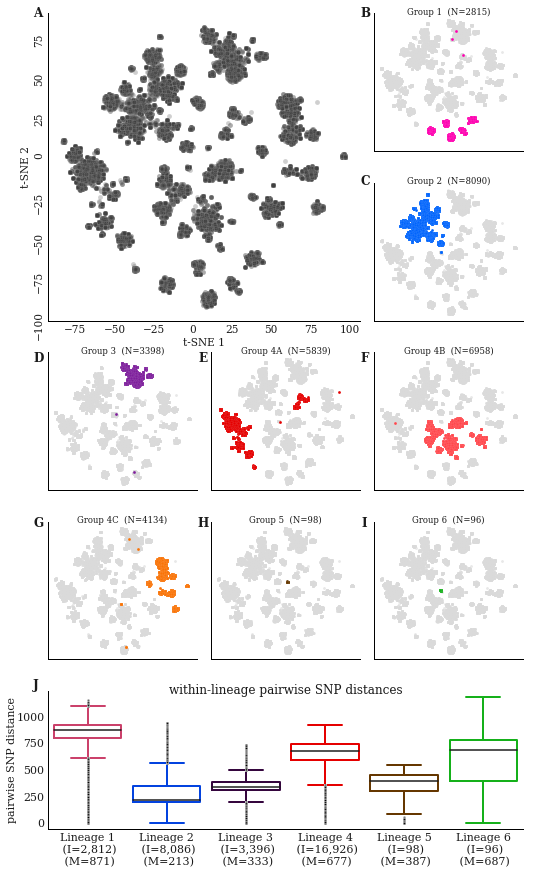

In [33]:
fig = plt.figure(constrained_layout=True)
spec = gridspec.GridSpec(ncols=3, nrows=5, figure=fig)
spec.update(wspace=0.10, hspace=0.23) # set the spacing between axes. 

axA = fig.add_subplot(spec[0:2, 0:2])
axB = fig.add_subplot(spec[0, 2])
axC = fig.add_subplot(spec[1, 2])
axD = fig.add_subplot(spec[2, 0])
axE = fig.add_subplot(spec[2, 1])
axF = fig.add_subplot(spec[2, 2])
axG = fig.add_subplot(spec[3, 0])
axH = fig.add_subplot(spec[3, 1])
axI = fig.add_subplot(spec[3, 2])
axJ = fig.add_subplot(spec[4, 0:3])

plot_tSNE(axA)
plot_tSNE_for_isolate_group('1' , 'xkcd:bright pink', axB)
plot_tSNE_for_isolate_group('2' , 'xkcd:bright blue', axC)
plot_tSNE_for_isolate_group('3' , 'xkcd:purple', axD)
plot_tSNE_for_isolate_group('4A' , 'xkcd:red', axE)
plot_tSNE_for_isolate_group('4B' , 'xkcd:light red', axF)
plot_tSNE_for_isolate_group('4C' , 'xkcd:orange', axG)
plot_tSNE_for_isolate_group('5' , 'xkcd:brown', axH)
plot_tSNE_for_isolate_group('6' , 'xkcd:green', axI)
within_lineage_boxplots(axJ)

fig.text(0.1, 0.877, 'A', fontsize=12 , fontweight='bold' , color = 'k')
fig.text(0.635, 0.877, 'B', fontsize=12 , fontweight='bold' , color = 'k')

fig.text(0.635, 0.722, 'C', fontsize=12 , fontweight='bold' , color = 'k')

fig.text(0.1, 0.558, 'D', fontsize=12 , fontweight='bold' , color = 'k')
fig.text(0.37, 0.558, 'E', fontsize=12 , fontweight='bold' , color = 'k')
fig.text(0.635, 0.558, 'F', fontsize=12 , fontweight='bold' , color = 'k')

fig.text(0.1, 0.405, 'G', fontsize=12 , fontweight='bold' , color = 'k')
fig.text(0.368, 0.405, 'H', fontsize=12 , fontweight='bold' , color = 'k')
fig.text(0.637, 0.405, 'I', fontsize=12 , fontweight='bold' , color = 'k')

fig.text(0.1, 0.255, 'J', fontsize=12 , fontweight='bold' , color = 'k')

fig = plt.gcf()
fig.set_size_inches(8.5, 15.0)
fig.tight_layout()

file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/Figures/for publication/tSNE_visuals_isolate_colored_by_group_and_within_lineage_distances.png'
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()